In [1]:
import re
import requests
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import datetime
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6

def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res.group()[:2]
    return 'na'

In [2]:
train = pd.read_csv('train_1.csv').fillna(0)
for col in train.columns[1:]:
    train[col] = pd.to_numeric(train[col],downcast='integer')
train['lang'] = train.Page.map(get_language)

In [3]:
def range_analysis(article, start, end):

    series_2015 = train[train['Page'] == '{0}_en.wikipedia.org_all-access_all-agents'.format(article)].loc[:,'2015-{}'.format(start):'2015-{}'.format(end)]
    series_2016 = train[train['Page'] == '{0}_en.wikipedia.org_all-access_all-agents'.format(article)].loc[:,'2016-{}'.format(start):'2016-{}'.format(end)]
    try: # Some topics don't have series for the 'all-access_all-agents' suffix
        series_2015.transpose().plot(kind='bar', title='2015 Pattern')
        series_2016.transpose().plot(kind='bar', title='2016 Pattern')                                                                                       
    except TypeError: # If not, then 'mobile-web_all-agents' can be attempted,
        # but note that this could throw an error as well, although very rarely
        series_2015 = train[train['Page'] == '{0}_en.wikipedia.org_mobile-web_all-agents'.format(article)].loc[:,'2015-{}'.format(start):'2015-{}'.format(end)]
        series_2016 = train[train['Page'] == '{0}_en.wikipedia.org_mobile-web_all-agents'.format(article)].loc[:,'2016-{}'.format(start):'2016-{}'.format(end)]
        series_2015.transpose().plot(kind='bar', title='2015 Pattern')
        series_2016.transpose().plot(kind='bar', title='2016 Pattern')
    plt.show()

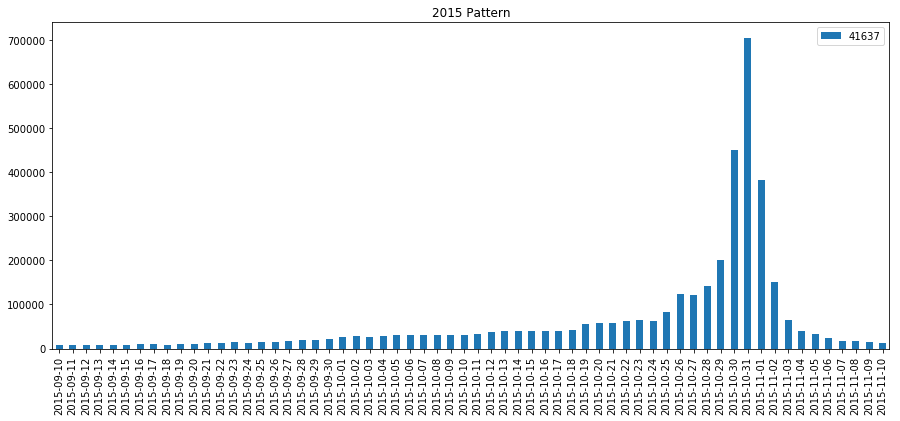

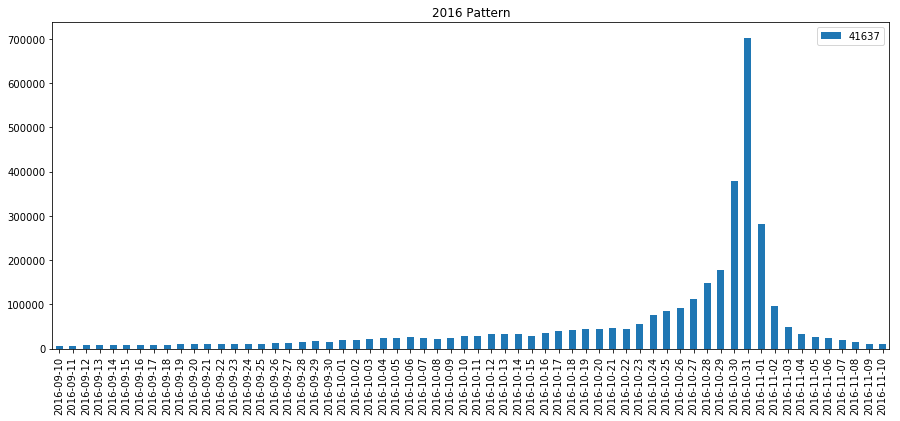

In [4]:
range_analysis('Halloween', '09-10','11-10')

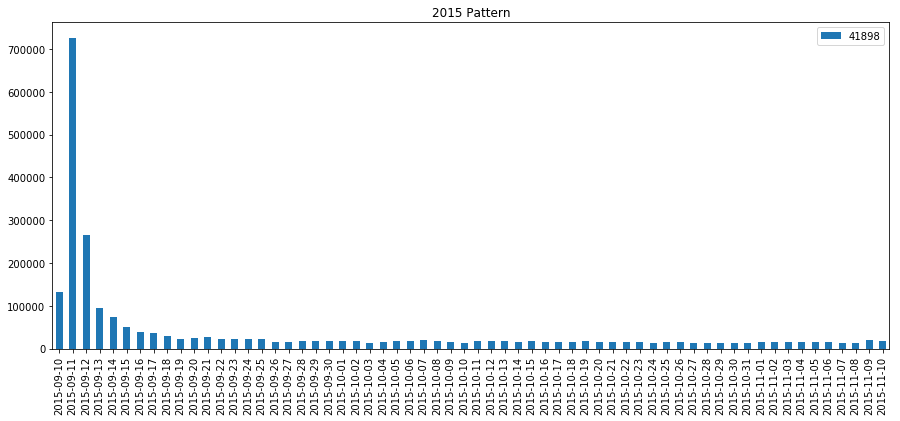

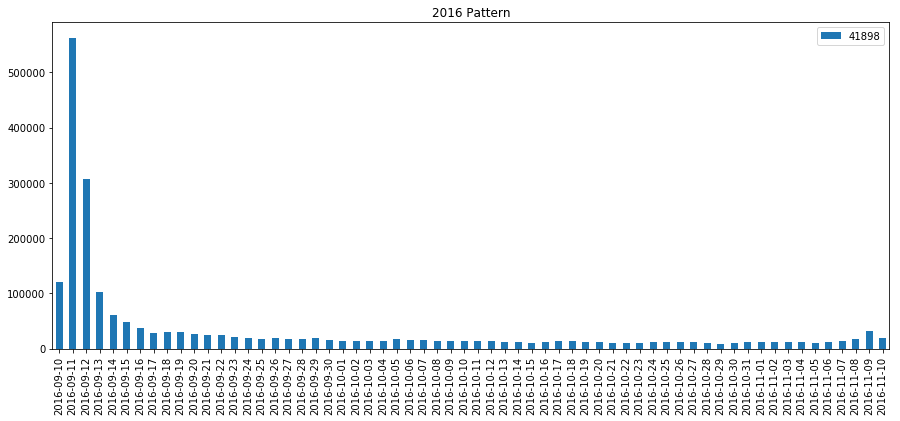

In [5]:
range_analysis('September_11_attacks', '09-10','11-10')

In [6]:
ENGLISH_MONTHS = {
          '01': 'January',
          '02': 'February',
          '03': 'March',
          '04': 'April',
          '05': 'May',
          '06': 'June',
          '07': 'July',
          '08': 'August',
          '09': 'September',
          '10': 'October',
          '11': 'November',
          '12': 'December'
         }

FRENCH_MONTHS = {
          '01': 'janvier',
          '02': 'février',
          '03': 'mars',
          '04': 'avril',
          '05': 'mai',
          '06': 'juin',
          '07': 'juillet',
          '08': 'août',
          '09': 'septembre',
          '10': 'octobre',
          '11': 'novembre',
          '12': 'décembre'
         }

JAPANESE_MONTHS = {
          '01': '1月',
          '02': '2月',
          '03': '3月',
          '04': '4月',
          '05': '5月',
          '06': '6月',
          '07': '7月',
          '08': '8月',
          '09': '9月',
          '10': '10月',
          '11': '11月',
          '12': '12月'
         }

CHINESE_MONTHS = {
          '01': '1月',
          '02': '2月',
          '03': '3月',
          '04': '4月',
          '05': '5月',
          '06': '6月',
          '07': '7月',
          '08': '8月',
          '09': '9月',
          '10': '10月',
          '11': '11月',
          '12': '12月'
         }

RUSSIAN_MONTHS = {
          '01': 'января',
          '02': 'февраля',
          '03': 'марта',
          '04': 'апреля',
          '05': 'мая',
          '06': 'июня',
          '07': 'июля',
          '08': 'августа',
          '09': 'сентября',
          '10': 'октября',
          '11': 'ноября',
          '12': 'декабря'
         }

GERMAN_MONTHS = {
          '01': 'Januar',
          '02': 'Februar',
          '03': 'März',
          '04': 'April',
          '05': 'Mai',
          '06': 'Juni',
          '07': 'Juli',
          '08': 'August',
          '09': 'September',
          '10': 'Oktober',
          '11': 'November',
          '12': 'Dezember'
         }

SPANISH_MONTHS = {
          '01': 'enero',
          '02': 'febrero',
          '03': 'marzo',
          '04': 'abril',
          '05': 'mayo',
          '06': 'junio',
          '07': 'julio',
          '08': 'agosto',
          '09': 'septiembre',
          '10': 'octubre',
          '11': 'noviembre',
          '12': 'diciembre'
         }

In [7]:
# English
def fetch_dates_en(start, end):
    en_dates = []
    date_range = pd.date_range(start,end)
    for date in date_range:
        month_day = datetime.strftime(date, '%Y-%m-%d')[-5:].split('-')
        en_dates.append(ENGLISH_MONTHS[month_day[0]] + '_{}'.format(str(int(month_day[1]))))
    return en_dates

# French
def fetch_dates_fr(start, end):
    fr_dates = []
    date_range = pd.date_range(start,end)
    for date in date_range:
        month_day = datetime.strftime(date, '%Y-%m-%d')[-5:].split('-')
        if int(month_day[1]) == 1:
            fr_dates.append('{}er_'.format(str(int(month_day[1]))) + FRENCH_MONTHS[month_day[0]])
        else:
            fr_dates.append('{}_'.format(str(int(month_day[1]))) + FRENCH_MONTHS[month_day[0]])
    return fr_dates

# Japanese
def fetch_dates_ja(start, end):
    ja_dates = []
    date_range = pd.date_range(start,end)
    for date in date_range:
        month_day = datetime.strftime(date, '%Y-%m-%d')[-5:].split('-')
        ja_dates.append(JAPANESE_MONTHS[month_day[0]] + '{}日'.format(str(int(month_day[1]))))
    return ja_dates

# Chinese
def fetch_dates_zh(start, end):
    zh_dates = []
    date_range = pd.date_range(start,end)
    for date in date_range:
        month_day = datetime.strftime(date, '%Y-%m-%d')[-5:].split('-')
        zh_dates.append(CHINESE_MONTHS[month_day[0]] + '{}日'.format(str(int(month_day[1]))))
    return zh_dates

# Russian
def fetch_dates_ru(start, end):
    ru_dates = []
    date_range = pd.date_range(start,end)
    for date in date_range:
        month_day = datetime.strftime(date, '%Y-%m-%d')[-5:].split('-')
        ru_dates.append('{}_'.format(str(int(month_day[1]))) + RUSSIAN_MONTHS[month_day[0]])
    return ru_dates

# German
def fetch_dates_de(start, end):
    de_dates = []
    date_range = pd.date_range(start,end)
    for date in date_range:
        month_day = datetime.strftime(date, '%Y-%m-%d')[-5:].split('-')
        de_dates.append('{}._'.format(str(int(month_day[1]))) + GERMAN_MONTHS[month_day[0]])
    return de_dates

# Spanish
def fetch_dates_es(start, end):
    es_dates = []
    date_range = pd.date_range(start,end)
    for date in date_range:
        month_day = datetime.strftime(date, '%Y-%m-%d')[-5:].split('-')
        es_dates.append('{}_de_'.format(str(int(month_day[1]))) + SPANISH_MONTHS[month_day[0]])
    return es_dates

start_date, end_date = '2016-01-01', '2016-12-31'

# There are 366 dates for each year because 2016 was a leap year (includes Feb. 29th)

english_dates = fetch_dates_en(start_date, end_date)
assert len(english_dates) == 366

french_dates = fetch_dates_fr(start_date, end_date)
assert len(french_dates) == 366

japanese_dates = fetch_dates_ja(start_date, end_date)
assert len(japanese_dates) == 366

chinese_dates = fetch_dates_zh(start_date, end_date)
assert len(chinese_dates) == 366

russian_dates = fetch_dates_ru(start_date, end_date)
assert len(russian_dates) == 366

german_dates = fetch_dates_de(start_date, end_date)
assert len(german_dates) == 366

spanish_dates = fetch_dates_es(start_date, end_date)
assert len(spanish_dates) == 366

In [11]:
type(english_dates)

list

In [13]:
def get_article(page):
    res = re.search('.*_*.wiki', page)
    return res.group()[:-8] # Extract article info. only

english_articles = train[train['lang'] == 'en']['Page'].map(get_article).tolist()
french_articles = train[train['lang'] == 'fr']['Page'].map(get_article).tolist()
japanese_articles = train[train['lang'] == 'ja']['Page'].map(get_article).tolist()
chinese_articles = train[train['lang'] == 'zh']['Page'].map(get_article).tolist()
russian_articles = train[train['lang'] == 'ru']['Page'].map(get_article).tolist()
german_articles = train[train['lang'] == 'de']['Page'].map(get_article).tolist()
spanish_articles = train[train['lang'] == 'es']['Page'].map(get_article).tolist()
non_language_articles = train[train['lang'] == 'na']['Page'].map(get_article).tolist()

assert len(english_articles) + len(chinese_articles) + len(japanese_articles) \
       + len(german_articles) + len(french_articles) + len(russian_articles) \
       + len(spanish_articles) + len(non_language_articles) == train.shape[0]
        
# print('Sample English articles: {0}, {1}, {2}'.format(*english_articles[:3]), sep=',')
# print('Sample Chinese articles: {0}, {1}, {2}'.format(*chinese_articles[:3]), sep=',')
# print('Sample Russian articles: {0}, {1}, {2}'.format(*russian_articles[:3]), sep=',')

In [18]:
train.Page.unique()

array(['2NE1_zh.wikipedia.org_all-access_spider',
       '2PM_zh.wikipedia.org_all-access_spider',
       '3C_zh.wikipedia.org_all-access_spider', ...,
       'Enamor\xc3\xa1ndome_de_Ram\xc3\xb3n_es.wikipedia.org_all-access_spider',
       'Hasta_el_\xc3\xbaltimo_hombre_es.wikipedia.org_all-access_spider',
       'Francisco_el_matem\xc3\xa1tico_(serie_de_televisi\xc3\xb3n_de_2017)_es.wikipedia.org_all-access_spider'], dtype=object)

In [19]:
get_article("2NE1_zh.wikipedia.org_all-access_spider")

'2NE1'

In [22]:
print chinese_articles[-1]

我的愛情不平凡


In [40]:
### The function below is responsible for the actual requesting and requires
### an Internet connection to call. We can define it in Kaggle without calling though.

def _request_parse_html(language, date):
    html = requests.get('https://{0}.wikipedia.org/wiki/{1}'.format(language,date))
    soup = BeautifulSoup(html.text, "html5lib")
    lists = soup.find_all('ul')
    all_articles = []
    for ul in lists:
        links = ul.find_all('a')
        for link in links:
            if language == 'ru':
                try:
                 # Russian hyperlinks have some strange encoding that I haven't figured out.
                 # We can't extract the link directly, so we'll take the title instead.
                 # In rare cases, the article titles and links differ, so matches will fail.
                 # Not as reliable as the regex below, but best we can do.
                    article = '_'.join(link['title'].split())
                    all_articles.append(article)
                except (AttributeError, KeyError, IndexError) as e:
                    continue
            elif language in {'ja', 'zh'}:
                try:
                # Asian hyperlinks have an encoding issue as well.
                # Don't need to split and rejoin though because these languages don't use spaces
                    article = link['title'] 
                    all_articles.append(article)
                except (AttributeError, KeyError, IndexError) as e:
                    continue
            else: 
                try:
                # Can extract link directly for English, French, German, Spanish
                # This extracts the article link directly and is guaranteed to work for matching links
                    article = re.search(r'(?<=/wiki/).*', link['href']).group()
                    all_articles.append(article)
                except (AttributeError, KeyError, IndexError) as e:
                    continue
    return all_articles

def find_key_articles(language, date, article_list):
    key_articles = set()
    date_articles = _request_parse_html(language, date)
    for article in article_list:
        if article in date_articles:
            key_articles.add(article)
    return key_articles

In [41]:
## start to get info

In [42]:
type(chinese_articles)

list

In [43]:
len(chinese_articles)

17229

In [44]:
print chinese_articles[-1]

我的愛情不平凡


In [46]:
## Require Internet connection

key_chinese_articles = dict()

for i, date in enumerate(chinese_dates):
    print i,
    key_articles = find_key_articles('zh', date, chinese_articles)
    key_chinese_articles[english_dates[i]] = key_articles

0

/Users/frank/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:44: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131

KeyboardInterrupt: 

In [47]:
len(key_chinese_articles)

131

In [48]:
key_chinese_articles

{'April_1': {'Google'},
 'April_10': set(),
 'April_11': set(),
 'April_12': set(),
 'April_13': set(),
 'April_14': set(),
 'April_15': set(),
 'April_16': set(),
 'April_17': {'MAMAMOO', 'SHINee'},
 'April_18': set(),
 'April_19': {'AKB48', 'Apink'},
 'April_2': set(),
 'April_20': {'EXO'},
 'April_21': set(),
 'April_22': {'T-ara'},
 'April_23': {'B1A4', 'YouTube'},
 'April_24': set(),
 'April_25': set(),
 'April_26': {'AKB48', 'BIGBANG'},
 'April_27': set(),
 'April_28': {'INFINITE'},
 'April_29': set(),
 'April_3': {'AKB48'},
 'April_30': {'2PM'},
 'April_4': {'AKB48'},
 'April_5': set(),
 'April_6': {'VIXX'},
 'April_7': set(),
 'April_8': {'AKB48', 'EXO', 'SHINee'},
 'April_9': set(),
 'February_1': {'AKB48', 'NCT', 'TWICE'},
 'February_10': set(),
 'February_11': {'Lovelyz'},
 'February_12': {'SISTAR', 'SpeXial'},
 'February_13': set(),
 'February_14': {'NCT', 'YouTube'},
 'February_15': {'Google', 'VIXX', 'YouTube'},
 'February_16': set(),
 'February_17': set(),
 'February_18'

In [37]:
for i in chinese_dates[:2]:
    print i

1月1日
1月2日


In [33]:
key_articles

set()

In [34]:
key_chinese_articles

{'January_1': {'NBA'}, 'January_2': set()}